In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate
import tqdm

In [2]:
def get_data():
    file = open('./data/shashlik_61_pulses.txt', 'r')
    data = file.readlines()
    data = np.array([list(map(float, experiment.split())) for experiment in data])
   
    X = data[:, 2:]
    y_baseline = data[:, 1]
    y = data[:, 0]
    
    return X, y

In [3]:
X, y = get_data()

In [47]:
X = np.array([experiment - np.max(experiment) for experiment in X])

In [172]:
def generate_multi_signal(tau, alpha, to_plot=False):
    
    ATTEMPTS_NUM = 10000
    cur_attempt = 0
    
    while cur_attempt < ATTEMPTS_NUM:
        first_idx = np.random.choice(y.shape[0], 1, replace=False)[0]

        first_impulse = X[first_idx]
        first_ref_time = y[first_idx]

        if first_ref_time > np.mean(y):
            second_ref_time = first_ref_time - tau
        else:
            second_ref_time = first_ref_time + tau

        second_idxs = np.where(y == second_ref_time)[0]
        
        if len(second_idxs) > 1:
            second_idx = np.random.choice(len(second_idxs), 1, replace=False)[0]
            second_impulse = X[second_idx]

            multi_impulse = first_impulse + alpha*second_impulse
            
#             print("INDEXES:")
#             print(first_idx)
#             print(second_idx)
            if to_plot:
                plt.plot(first_impulse)
                plt.plot(second_impulse)
                plt.plot(multi_impulse)
                plt.legend(['First signal', 'Second signal', 'Sum of signals'])
                plt.show()
    
            return multi_impulse
        else:
            cur_attempt += 1
            continue
    print("Value of tau = %i is too big" %tau)

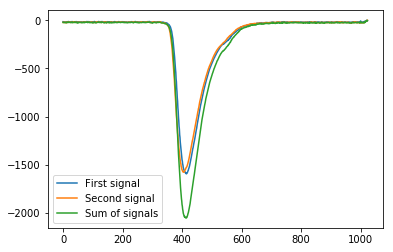

array([-21.764, -21.781, -24.148, ...,  -2.082,  -2.36 ,  -4.85 ])

In [196]:
generate_multi_signal(57, 0.3, to_plot=True)